In [492]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [493]:
# loading the dataset
winedf = pd.read_csv('winequality-red.csv',sep=';')
winedf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [494]:
winedf_train,winedf_value = train_test_split(winedf,test_size=0.25,random_state=50)
winedf_value,winedf_test = train_test_split(winedf_value,test_size=0.4,random_state=50)




In [495]:
def op_sse(upphi,t): #t is for target matrix
    upphi = np.concatenate((np.ones((upphi.shape[0],1),int),upphi),1) #np.ones((# of rows in upphi,columns)) (THIS IS THE DESIGN MATRIX)
    return np.linalg.pinv(upphi)@t #the minimizer of sum of squares error function we calculated

#this is the function that calculates the weights for the linear regression model (w_ML)


In [496]:
def sse(w,phi,t):
    phi = np.insert(phi,0,1,axis=0)
    w_T = w.T
    polyf = w_T @ phi #polynomial function w^T*phi(x)
    return (1/2)*np.sum((polyf-t)**2) #sum of squares error function

def pred(op_sse,phi):
    phi = np.insert(phi,0,1,axis=0)
    return op_sse.T @ phi #prediction function, it calculates the predicted value by using the minimizer of sum of squares error function and the design matrix
#also called the point estimate



In [497]:
X_train = winedf_train.drop('quality',axis=1).values #X_train is the feature matrix (design matrix without bias) of the train set
y_train = winedf_train['quality'].values #y_train is the target matrix of the train set

w_ML = op_sse(X_train,y_train) #w_ML is the minimizer of sum of squares error function

In [498]:
y_train_pred = pred(w_ML,X_train.T) #y_train_pred is the predicted value of the training set
print(np.shape(y_train_pred)) # 1199 quality predictions for 1199 wines

(1199,)


In [499]:
X_test = winedf_test.drop('quality',axis=1).values #X_test is the feature matrix of the test set
y_test = winedf_test['quality'].values #y_test is the target matrix of the test set

In [500]:
y_test_pred = pred(w_ML,X_test.T) #y_test_pred is the predicted value of the test set
print(np.shape(y_test_pred)) # 160 quality predictions for 160 wines

(160,)


In [501]:
def rmse(w,phi,t,N):
    return np.sqrt(2*sse(w,phi,t)/N) #root mean square error function

In [502]:
rmse_train = rmse(w_ML,X_train.T,y_train,len(y_train)) #rmse of the training set
rmse_test = rmse(w_ML,X_test.T,y_test,len(y_test)) #rmse of the test set

print('RMSE of the training set:',rmse_train)
print('RMSE of the test set:',rmse_test)

# For the training set, it says that the average prediction error is about 0.65 points off from the actual quality of the wine.
# For the test set, it says that the average prediction error is about 0.63 points off from the actual quality of the wine.
# The RMSE values are close to each other, which means that the model is not overfitting and is overall a good model.

RMSE of the training set: 0.6502411933180963
RMSE of the test set: 0.6430906550433568


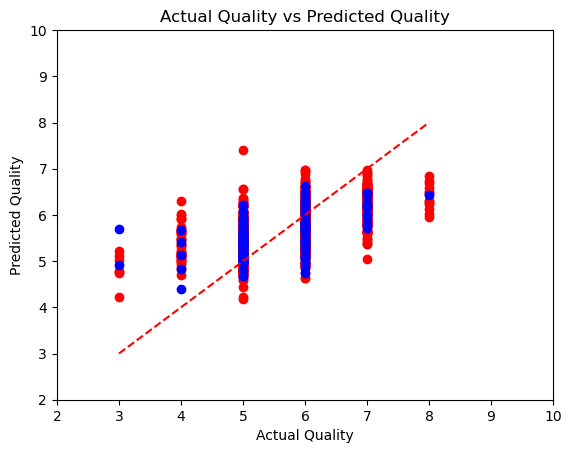

In [513]:
#cell for plotting
import matplotlib.pyplot as plt
plt.xlim(2,10)
plt.ylim(2,10)
plt.plot(y_train,y_train_pred,'ro')
plt.plot(y_test,y_test_pred,'bo')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual Quality vs Predicted Quality')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.show()

#red points are the training set, blue points are the test set
#the closer the points are to the line y=x, the better the model is

In [504]:
print("sizes")
print("w_ML:",np.shape(w_ML))
print("y_train:", np.shape(y_train))
print("X_train:", np.shape(X_train))
print("y_train_pred:", np.shape(y_train_pred))
print("X_test:", np.shape(X_test))
print("y_test:", np.shape(y_test))
print("y_test_pred:", np.shape(y_test_pred))

print(X_train[1]) #each matrix in X_train is a row of the feature matrix of size 1x11
# w_ML is a matrix of size 12x1 so we need to add a bias to each row of X_train to make it 1x12

# needed this to organize what was going on mathematically

print(np.random.rand(1,12))
print(w_ML)

sizes
w_ML: (12,)
y_train: (1199,)
X_train: (1199, 11)
y_train_pred: (1199,)
X_test: (160, 11)
y_test: (160,)
y_test_pred: (160,)
[ 5.2      0.645    0.       2.15     0.08    15.      28.       0.99444
  3.78     0.61    12.5    ]
[[0.09539043 0.70306909 0.40075407 0.42340877 0.27807345 0.03255484
  0.08792046 0.73574585 0.02467767 0.8525503  0.95846455 0.46420127]]
[ 1.24626653e+01  1.45398402e-02 -1.20402749e+00 -2.77460555e-01
  8.12790537e-03 -2.06049730e+00  5.73259706e-03 -3.47305992e-03
 -8.05852465e+00 -4.54832370e-01  9.11432756e-01  2.81989740e-01]


In [505]:
def lms(w_ML,X,y,epochs=1000):
    X = np.insert(X,0,1,axis=1) #adding bias to the feature matrix
    #w_ML = np.random.rand(12,1) #initializing the weights, if you dont do this it's pretty accurate
    for epoch in range(epochs): #for each epoch it loops the model to update the weights
        for i in range(0,len(y)):
            w_ML = w_ML+(0.0000001*(y[i] - w_ML.T @ X[i])*X[i]) #this is the LMS function itself 
    return w_ML



In [507]:
print("rmse_train:",rmse_train)
print("rmse_test:",rmse_test)

rmse2_train = rmse(lms(w_ML,X_train,y_train),X_train.T,y_train,len(y_train))
rmse2_test = rmse(lms(w_ML,X_test,y_test),X_test.T,y_test,len(y_test))

print("rmse+lms_train:",rmse2_train) #results of rmse with lms on the training set
print("rmse+lms_test:",rmse2_test) #results of rmse with lms on the test set

#When adjusting rmse2's learning rate to 0.000001, the RMSE values are 0.65 for the training set and 0.63 for the test set.
#These values are the same as the RMSE values of the original model, which means that the model is still a good model.

rmse_train: 0.6502411933180963
rmse_test: 0.6430906550433568
rmse+lms_train: 0.6502544848835153
rmse+lms_test: 0.6270685484774907
